/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


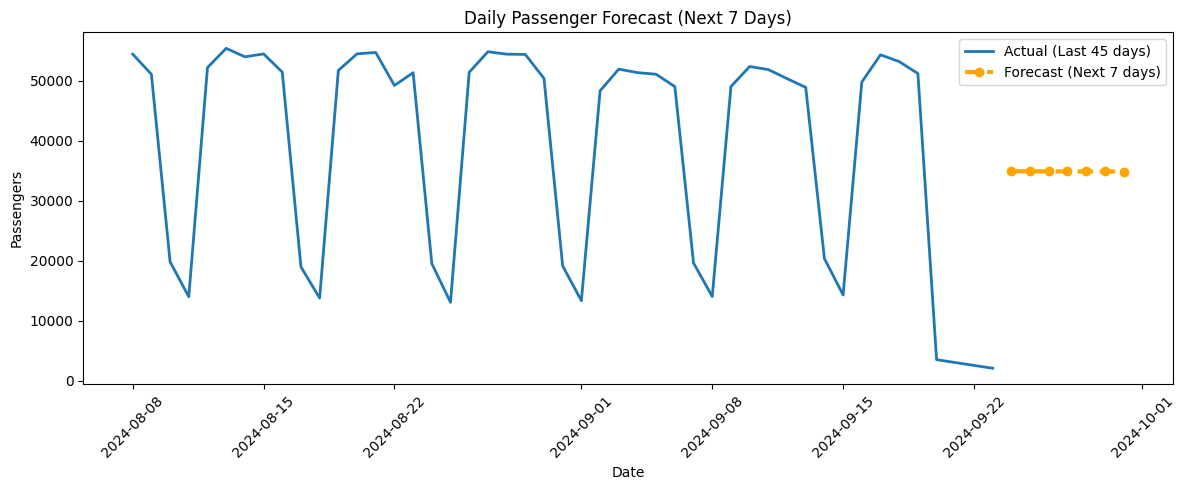

In [30]:
!pip install pandas numpy matplotlib statsmodels
#imoport libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load data
df = pd.read_csv("/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df = df.sort_values("Date")

# Total column
cols = ["Local Route","Light Rail","Peak Service","Rapid Route","School","Other"]
cols = [c for c in cols if c in df.columns]
df["Total"] = df[cols].sum(axis=1)

# Remove bad days at end
df_clean = df[df["Total"] > 1000]

# Holt forecast model
model = ExponentialSmoothing(df_clean["Total"], trend="add").fit()
forecast = model.forecast(7)

last_date = df_clean["Date"].iloc[-1]
forecast_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=7)

# plotting the graph
plt.figure(figsize=(12,5))
plt.plot(df_clean["Date"].iloc[-45:], df_clean["Total"].iloc[-45:],
         label="Actual (Last 45 days)", linewidth=2)

plt.plot(forecast_dates, forecast,
         label="Forecast (Next 7 days)",
         linestyle="--", linewidth=3, color="orange", marker="o")

plt.title("Daily Passenger Forecast (Next 7 Days)")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()



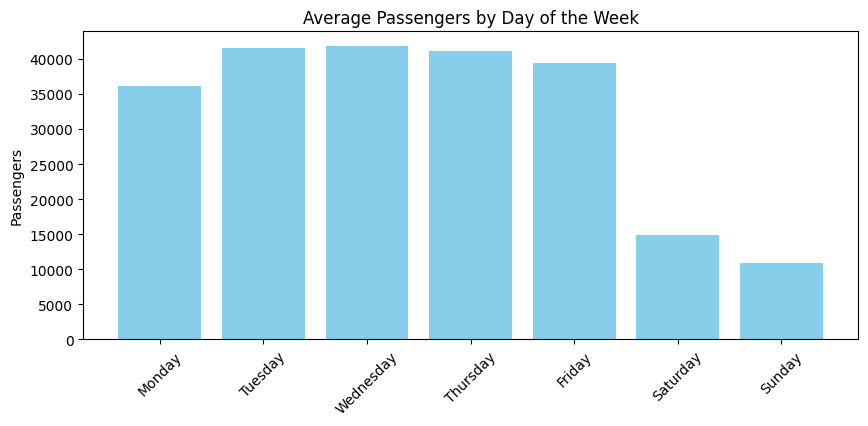

In [36]:
#for 1st insight
# Trying to understand if weekdays are busier than weekends

import pandas as pd
import matplotlib.pyplot as plt

# Loading the data again
df = pd.read_csv("/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

# Making sure data is sorted
df = df.sort_values("Date")

# Creating a Total passengers column
service_cols = ["Local Route","Light Rail","Peak Service","Rapid Route","School","Other"]
service_cols = [col for col in service_cols if col in df.columns]
df["Total"] = df[service_cols].sum(axis=1)

# Creating a column to know which day of the week it is
df["Day"] = df["Date"].dt.day_name()

# Finding average passengers for each day
avg_by_day = df.groupby("Day")["Total"].mean()

# Reordering so Monday comes first
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
avg_by_day = avg_by_day.reindex(order)

# Simple bar chart to compare weekdays vs weekends
plt.figure(figsize=(10,4))
plt.bar(avg_by_day.index, avg_by_day.values, color="skyblue")
plt.title("Average Passengers by Day of the Week")
plt.ylabel("Passengers")
plt.xticks(rotation=45)
plt.show()


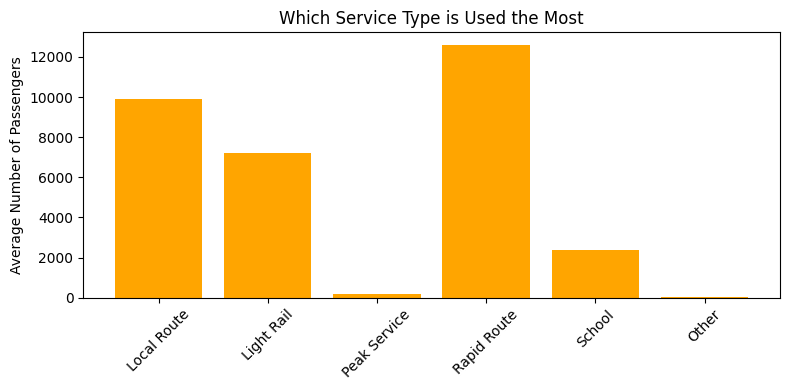

In [35]:
#for 2ndst insight

import pandas as pd
import matplotlib.pyplot as plt

# Loading my dataset
data = pd.read_csv("/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv")

# Converting the date column
data["Date"] = pd.to_datetime(data["Date"], dayfirst=True)
data = data.sort_values("Date")

# These are the service columns I'm interested in
service_types = ["Local Route", "Light Rail", "Peak Service",
                 "Rapid Route", "School", "Other"]

# Sometimes a column might be missing, so I only keep the ones that exist
service_types = [s for s in service_types if s in data.columns]

# Finding the average passengers for each service
service_means = data[service_types].mean()

# Plotting a simple bar chart to compare them
plt.figure(figsize=(8,4))
plt.bar(service_means.index, service_means.values, color="orange")

plt.title("Which Service Type is Used the Most")
plt.ylabel("Average Number of Passengers")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [43]:
!get init
!git remote aa orgin https://github.com/vidhyya/Daily-passenger-journey.git


/bin/bash: line 1: get: command not found
fatal: not a git repository (or any of the parent directories): .git
